DESCRIÇÃO: Configuração de gráfico do IBOVESPA com média móvel de 21 x 9, utilizado em tempo gráfico de 5 minutos.

# IMPORTANDO BIBLIOTECAS


In [10]:
#bibliotecas
import sys                           
import pandas as pd                        #Biblioteca de ciencia de dados;
import pandas_datareader.data as web       #Yahoo Fianace;
import numpy as np                         #Biblioteca Matematica;
from datetime import datetime              #Biblioteca para data e hora;
import matplotlib.pyplot as plt            #Biblioteca para plotagem de Gráficos;

# OBTENDO DADOS DO BOVESPA

In [34]:
ibov = web.get_data_yahoo('^BVSP')
ibov

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-08-27,47997.000000,46038.000000,46038.000000,47715.000000,4252000.0,47715.000000
2015-08-28,47872.000000,46847.000000,47697.000000,47154.000000,3778600.0,47154.000000
2015-08-31,47151.000000,45570.000000,47151.000000,46626.000000,4667300.0,46626.000000
2015-09-01,46625.000000,45278.000000,46625.000000,45477.000000,3665000.0,45477.000000
2015-09-02,46474.000000,45445.000000,45484.000000,46464.000000,3740100.0,46464.000000
...,...,...,...,...,...,...
2020-08-19,102334.000000,100800.000000,102072.000000,100854.000000,10025800.0,100854.000000
2020-08-20,101749.000000,99131.000000,100853.000000,101468.000000,9405000.0,101468.000000
2020-08-21,101566.000000,100412.000000,101460.000000,101521.000000,9100200.0,101521.000000


#PLOTAGEM DE GRÁFICO

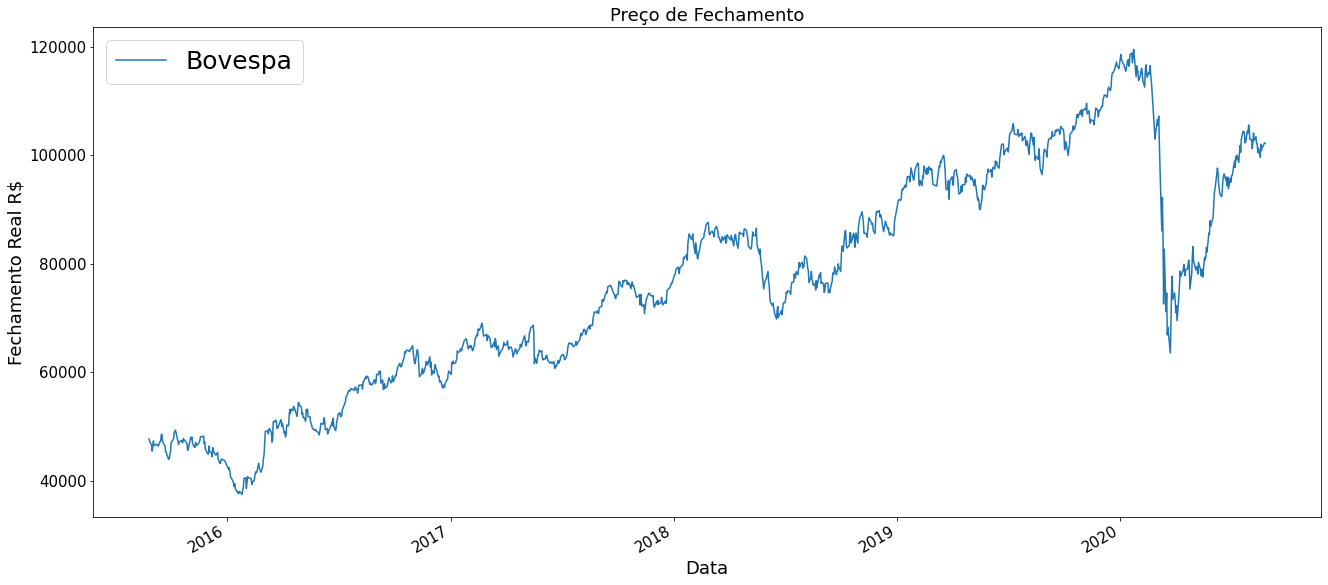

In [26]:
ibov["Close"].plot(figsize=(22,10),fontsize=15, label='Bovespa') #Plotar fechamento de mercado;
plt.title('Preço de Fechamento',fontsize=18)                     #Titulo e Tamanho fonte;
plt.xlabel('Data', fontsize=18)                                  #Coordenada X;
plt.ylabel('Fechamento Real R$',fontsize=18)                     #Coordenada Y;
plt.legend(loc='upper left',fontsize=25)                         #Legenda Gráfico e Tamanho Fonte;


# Média Móvel de 21 candle`s

In [37]:
M21 = pd.DataFrame()
M21['Adj Close'] = ibov ['Adj Close'].rolling(window=21).mean()
M21

,Adj Close
Date,
2015-08-27,NaN
2015-08-28,NaN
2015-08-31,NaN
2015-09-01,NaN
2015-09-02,NaN
...,...
2020-08-19,102709.095238
2020-08-20,102574.714286
2020-08-21,102537.952381


#Média Móvel de 9 candle`s

In [38]:
M9 = pd.DataFrame()
M9['Adj Close'] = ibov ['Adj Close'].rolling(window=9).mean()
M9

,Adj Close
Date,
2015-08-27,NaN
2015-08-28,NaN
2015-08-31,NaN
2015-09-01,NaN
2015-09-02,NaN
...,...
2020-08-19,101648.888889
2020-08-20,101503.555556
2020-08-21,101289.888889


# Visualização de Gráficos

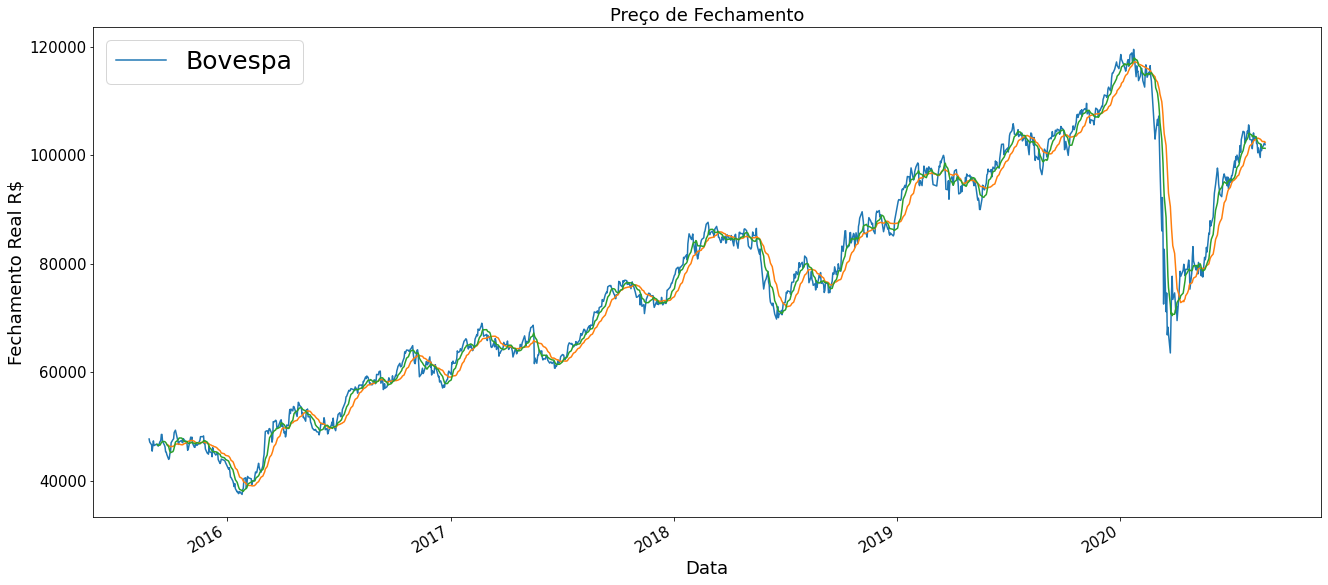

In [39]:
ibov["Close"].plot(figsize=(22,10),fontsize=15, label='Bovespa') #Plotar fechamento de mercado;
plt.title('Preço de Fechamento',fontsize=18)                     #Titulo e Tamanho fonte;
plt.xlabel('Data', fontsize=18)                                  #Coordenada X;
plt.ylabel('Fechamento Real R$',fontsize=18)                     #Coordenada Y;
plt.legend(loc='upper left',fontsize=25)                         #Legenda Gráfico e Tamanho Fonte;
plt.plot(M21['Adj Close'], label='M21')
plt.plot(M9['Adj Close'], label='M9')

# ARMAZENAMENTO DE DADOS EM FRAMES

In [40]:
data = pd.DataFrame()
data['Bovespa'] = ibov['Adj Close']
data['M21'] = M21['Adj Close']
data['M9'] = M9['Adj Close']
data

,Bovespa,M21,M9
Date,,,
2015-08-27,47715.000000,NaN,NaN
2015-08-28,47154.000000,NaN,NaN
2015-08-31,46626.000000,NaN,NaN
2015-09-01,45477.000000,NaN,NaN
2015-09-02,46464.000000,NaN,NaN
...,...,...,...
2020-08-19,100854.000000,102709.095238,101648.888889
2020-08-20,101468.000000,102574.714286,101503.555556
2020-08-21,101521.000000,102537.952381,101289.888889


# FUNÇÃO PARA INDICADOR DE COMPRA E VENDA

In [41]:
def buySell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(len(data)):
    if data ['M9'][i] > data['M21'][i]:
      if flag != 1:
        sigPriceBuy.append(data['Bovespa'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['M9'][i] < data['M21'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['Bovespa'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
  return(sigPriceBuy, sigPriceSell)

#ARMAZENANDO DADOS DE COMPRA E VENDA EM VARIÁVEIS

In [42]:
buySell = buySell(data)
data['Buy Signal Price'] = buySell[0]
data['Sell Signal Price'] = buySell[1]
#Mostrar os dados
data

,Bovespa,M21,M9,Buy Signal Price,Sell Signal Price
Date,,,,,
2015-08-27,47715.000000,NaN,NaN,NaN,NaN
2015-08-28,47154.000000,NaN,NaN,NaN,NaN
2015-08-31,46626.000000,NaN,NaN,NaN,NaN
2015-09-01,45477.000000,NaN,NaN,NaN,NaN
2015-09-02,46464.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-08-19,100854.000000,102709.095238,101648.888889,NaN,NaN
2020-08-20,101468.000000,102574.714286,101503.555556,NaN,NaN
2020-08-21,101521.000000,102537.952381,101289.888889,NaN,NaN


# PLOTANDO GRAFICOS E SINALIZAÇÕES

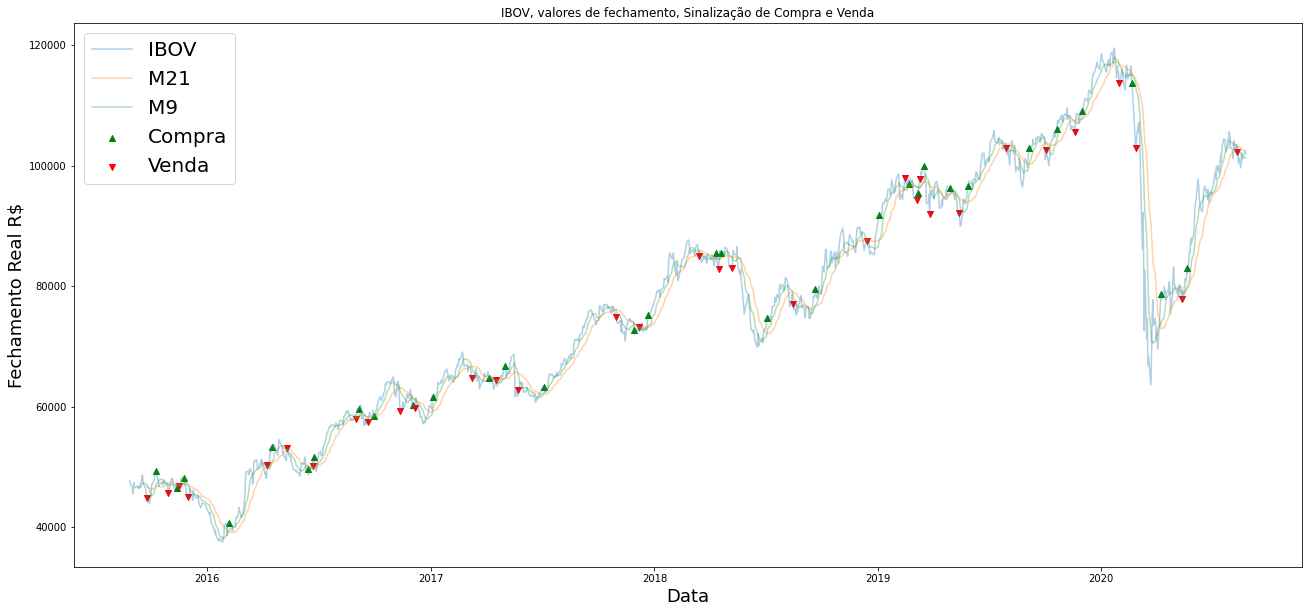

In [45]:
plt.figure(figsize=(22,10))
plt.plot(data['Bovespa'], label='IBOV', alpha=0.35)
plt.plot(data['M21'], label='M21', alpha=0.35)
plt.plot(data['M9'],label='M9', alpha=0.35)
plt.scatter(data.index, data['Buy Signal Price'], label ='Compra', marker='^',color='green')
plt.scatter(data.index, data['Sell Signal Price'],label='Venda', marker='v', color='red')
plt.title('IBOV, valores de fechamento, Sinalização de Compra e Venda')
plt.xlabel('Data', fontsize=18) 
plt.ylabel('Fechamento Real R$',fontsize=18)  
plt.legend(loc='upper left',fontsize=20)    
plt.show()